In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


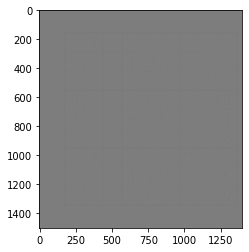

In [56]:
img=cv2.imread('sudoku.tif',0)
plt.imshow(img,cmap='gray')

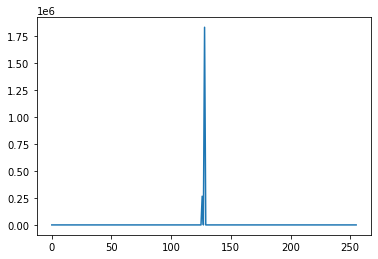

In [44]:

hist=cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)



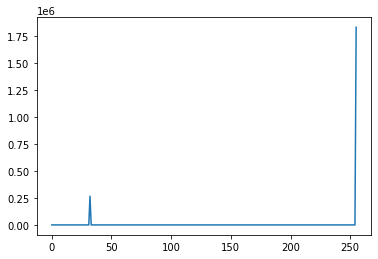

In [45]:
equalized_img=cv2.equalizeHist(img)
cv2.imwrite('equalized_sudoku.jpg',equalized_img)
new_img=cv2.calcHist([equalized_img],[0],None,[256],[0,256])
plt.plot(new_img)

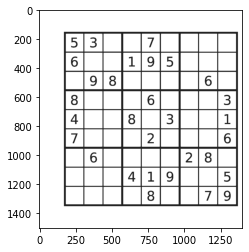

In [46]:
sudoko_img=cv2.imread('equalized_sudoku.jpg',0)
plt.imshow(sudoko_img,cmap='gray')


In [47]:
def find_upleft_coordinate():
    for i in range(sudoko_img.shape[0]):
        for j in range(sudoko_img.shape[1]):
            if sudoko_img[i,j]!=255:
                #print(i,j)
                return i,j


x1,y1=find_upleft_coordinate()

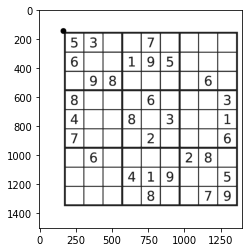

In [48]:
cv2.circle(sudoko_img,(168,144),20,(0,0,0),-1)
plt.imshow(sudoko_img,cmap='gray')

In [49]:
def find_downright_coordinate():
    for i in range(sudoko_img.shape[0]-1,0,-1):
        for j in range(sudoko_img.shape[1]-1,0,-1):
            if sudoko_img[i,j]!=255:
                print(i,j)
                return i,j

x2,y2=find_downright_coordinate()                

1351 1374


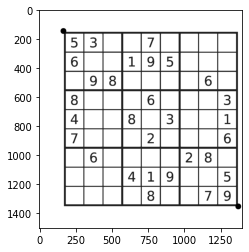

In [50]:
cv2.circle(sudoko_img,(1374,1351),20,(0,0,0),-1)
plt.imshow(sudoko_img,cmap='gray')

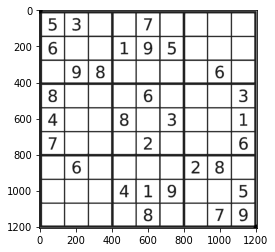

In [51]:
sudoko=sudoko_img[x1:x2,y1:y2]
plt.imshow(sudoko,cmap='gray')

In [52]:
def count_number_cell(img):
    rows,cols=img.shape
    ten_percent_rows=rows//10
    ten_percent_colls=cols//10

    counter=0

    for i in range(ten_percent_rows,rows-ten_percent_rows):
        for j in range(ten_percent_colls,cols-ten_percent_colls):
            if img[i,j]!=255:
                counter+=1

    return counter

In [62]:
width,height=sudoko.shape
cell_width=width//9
cell_height=height//9

print(cell_width,cell_height)

counter=0
avg_cell=(cell_width*cell_height)/17
print(avg_cell)
for i in range(0,width,cell_width):
    for j in range(0,height,cell_height):
        small_cell=sudoko[i:i+cell_width,j:j+cell_height]
        if small_cell.shape==(cell_width,cell_height):
            if count_number_cell(small_cell)>avg_cell:
               cv2.imwrite(f'cells/{counter}.jpg',small_cell)
               counter+=1




134 134
1056.235294117647
